## Step-1 First verify the given keras model is working fine 

Model Loaded successfully...
Detecting License Plate ... 
1/1 [==============================] - 1s 755ms/step


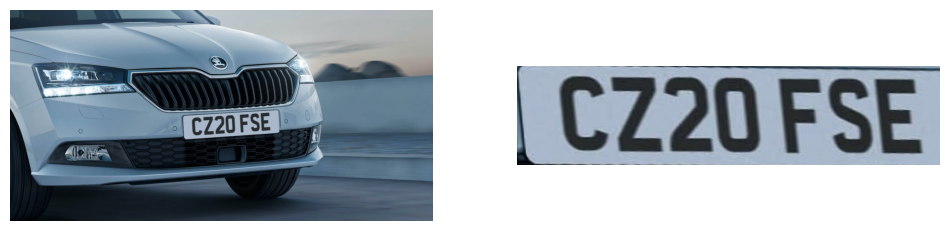

In [42]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from local_utils import detect_lp
from os.path import splitext,basename
from tensorflow.keras.models  import model_from_json
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import glob

def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Model Loaded successfully...")
        print("Detecting License Plate ... ")
        return model
    except Exception as e:
        print(e)
wpod_net_path = "models/wpod-net.json"
wpod_net = load_model(wpod_net_path)

def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

def get_plate(image_path, Dmax=608, Dmin = 608):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return vehicle, LpImg, cor

test_image_path = "dataset/plate5.jpeg"
vehicle, LpImg, cor = get_plate(test_image_path)

fig = plt.figure(figsize=(12,6))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.axis(False)
plt.imshow(vehicle)
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[1])
plt.axis(False)
plt.imshow(LpImg[0])

In [13]:
from PIL import Image
import pytesseract
import easyocr

<PIL.Image.Image image mode=RGB size=470x110 at 0x157DE60D0>


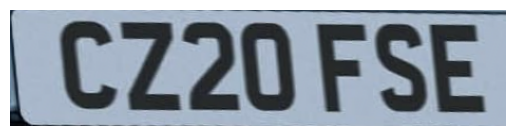

In [43]:
converted_image = (LpImg[0] * 255).astype(np.uint8)
image=Image.fromarray(converted_image)
print(image)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()
text = pytesseract.image_to_string(image)
print(text)

In [38]:
reader = easyocr.Reader(['en'])


In [44]:
result = reader.readtext(converted_image)

In [39]:
result

[([[34, 0], [461, 0], [461, 110], [34, 110]], 'CZZO FSE', 0.9437991990016406)]

In [45]:
result[0][1]

'CZZO FSE'